In [2]:
%load_ext autoreload
%autoreload 1
    
%aimport neurons

import numpy as np
from neurons import *

('Roots: ', [{'v': -1.199408035244035}, {'w': -0.6242600440550438}])

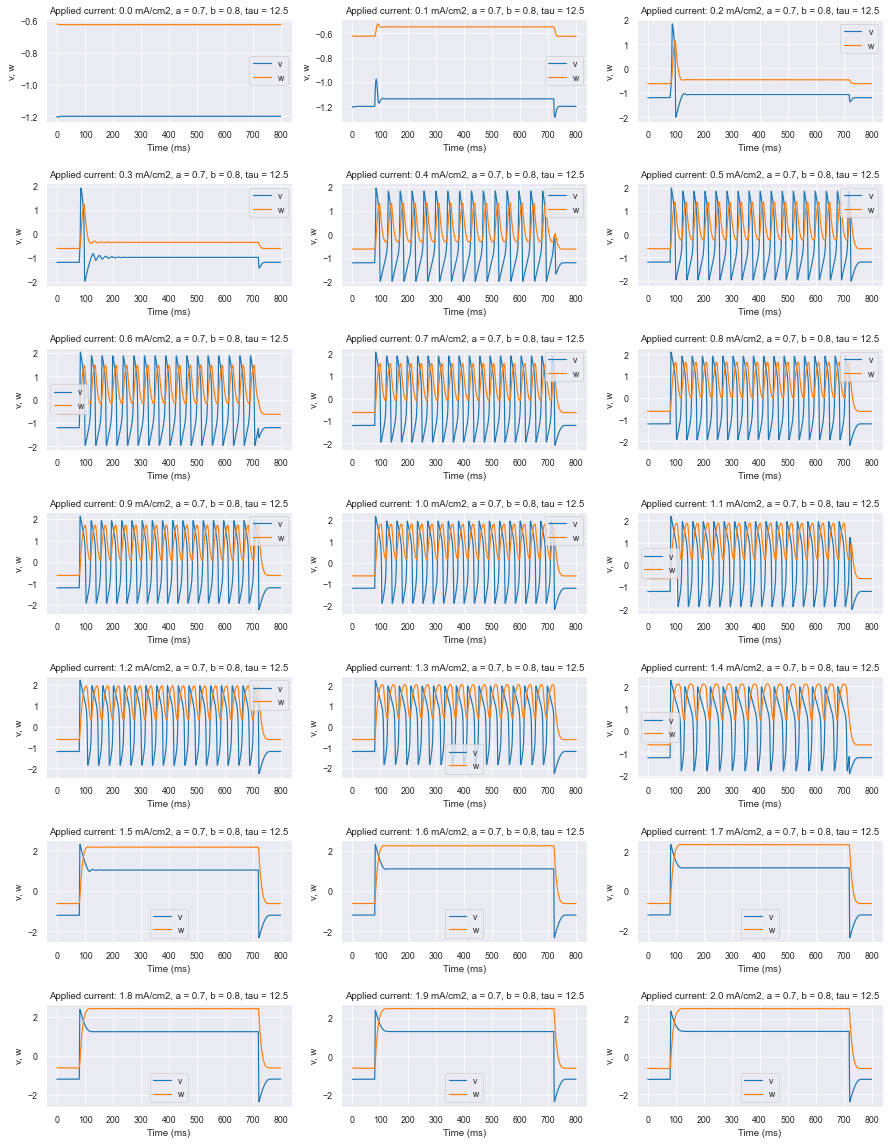

In [85]:
# Finding steady states and threshold current in FHN.
# This cell will show the roots for the FHN model and 7 x 3 current plots in a large figure.

FHN_neuron = FHN_Neuron() # default params

currents = np.linspace(0,2,num = 21) # array of currents to pass to FHN_neuron

# For loop to create a large figure overview of FHN plots
fig = plt.figure(figsize=(15, 20))
fig.subplots_adjust(hspace=0.6, wspace=0.2)
for i , current in enumerate(currents):
    
    ax = fig.add_subplot(7, 3, i+1)
    FHN_neuron.plot( FHN_neuron.solve(round(current,2)) , ax=ax, save=False)
    
#     ax = fig.add_subplot(7, 3, i+1)
#     FHN_neuron.plot_phase_diagram(FHN_neuron.solve(round(current,2)), round(current,2), ax=ax, title=None)


# fig.savefig("Figures/FHN_Range_nullcline.eps", format='eps')

FHN_neuron.solve_ss() # solve roots and print

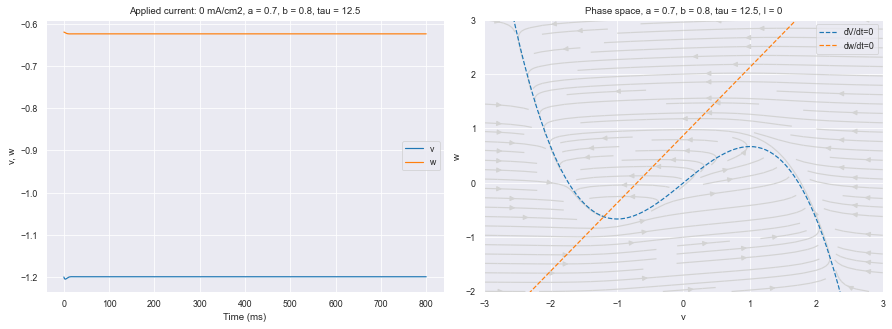

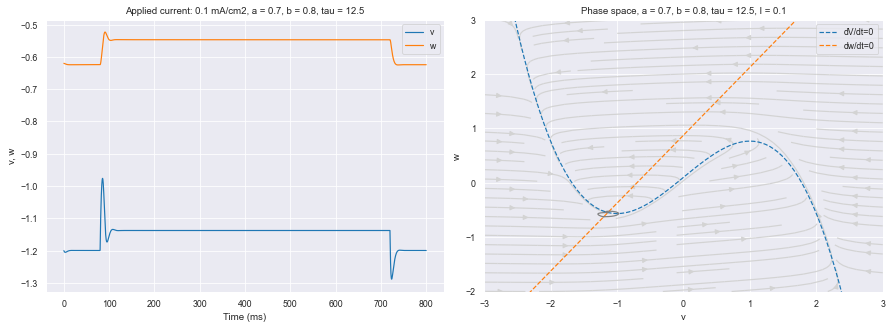

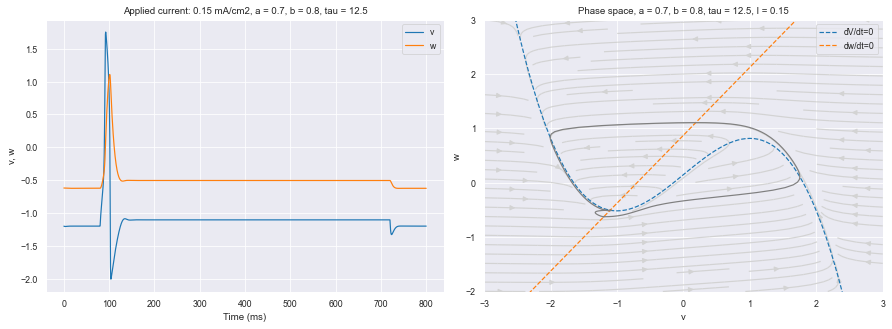

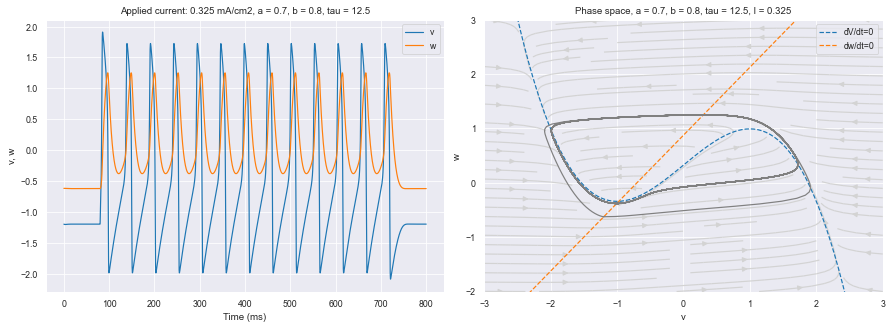

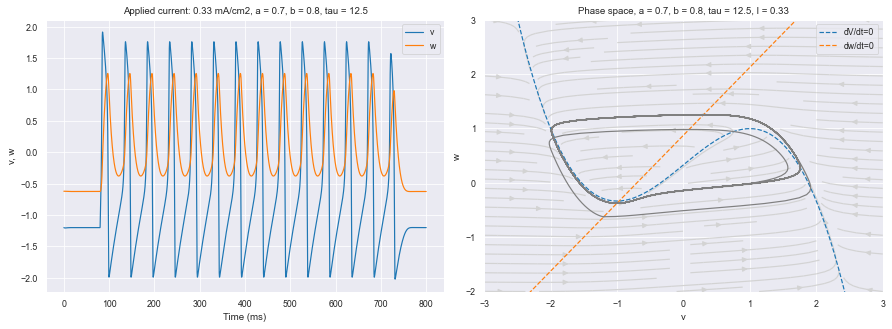

In [86]:
# This cell is used to investigate each parameter.
# Plots two plots per neuron. Spike trains (v,w vs time) and corresponding phase diagram 

scenarios = [
    {"a":0.7, "b":0.8, "tau":12.5, "I":0},
    {"a":0.7, "b":0.8, "tau":12.5, "I":0.1}, 
    {"a":0.7, "b":0.8, "tau":12.5, "I":0.15},
    {"a":0.7, "b":0.8, "tau":12.5, "I":0.325},
    {"a":0.7, "b":0.8, "tau":12.5, "I":0.33}
    
#     {"a":0.3, "b":0.8, "tau":12.5, "I":0.325},
#     {"a":0.5, "b":0.8, "tau":12.5, "I":0.325},
#     {"a":0.7, "b":0.8, "tau":12.5, "I":0.325},
#     {"a":0.8, "b":0.8, "tau":12.5, "I":0.325},
    
#     {"a":0.7, "b":0.1, "tau":12.5, "I":0.325},
#     {"a":0.7, "b":0.7, "tau":12.5, "I":0.325},
#     {"a":0.7, "b":0.8, "tau":12.5, "I":0.325},
#     {"a":0.7, "b":0.9, "tau":12.5, "I":0.325},
    
#     {"a":0.7, "b":0.8, "tau":9, "I":0.325},
#     {"a":0.7, "b":0.8, "tau":12.5, "I":0.325},
#     {"a":0.7, "b":0.8, "tau":25, "I":0.325},
#     {"a":0.7, "b":0.8, "tau":50, "I":0.325},
    
#     {"a":-0.4, "b":0.8, "tau":12.5, "I":0.325},
#     {"a":0.7, "b":0.8, "tau":12.5, "I":0.325},
#     {"a":0.8, "b":0.8, "tau":12.5, "I":0.325},
    
#     {"a":0.7, "b":-0.5, "tau":12.5, "I":0.325},
#     {"a":0.7, "b":0.6, "tau":12.5, "I":0.325},
#     {"a":0.7, "b":0.7, "tau":12.5, "I":0.325},
]

for i, sc in enumerate(scenarios):
    # title = "/phase_diag/phase_diagI=%s" % sc['I']]
    # title = "nullcline_I=%s" % sc['I']
    # title = "/a/spike_nullcline_a=%s" % sc['a']
    title = "/b/spike_nullcline_b=%s" % sc['b']
    
    FHN_neuron = FHN_Neuron(a = sc['a'], b = sc['b'], tau = sc['tau'])
    FHN_neuron.plot(FHN_neuron.solve(sc['I']), save=[False,title])
#     FHN_neuron.plot_phase_diagram(FHN_neuron.solve(sc['I']), sc['I'], ax=None, title=None)


# plt.savefig('Figures/'+title+'.eps', format='eps')

# Rinzel Neuron

/Users/jade/Development/Neuroscience/SysMIC/_Mini Project/neurons.py:353: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


('Roots: ',
 [{'v': -1.0292457834184714},
  {'w': -0.41155722927308924},
  {'z': 0.25424578341847137}])

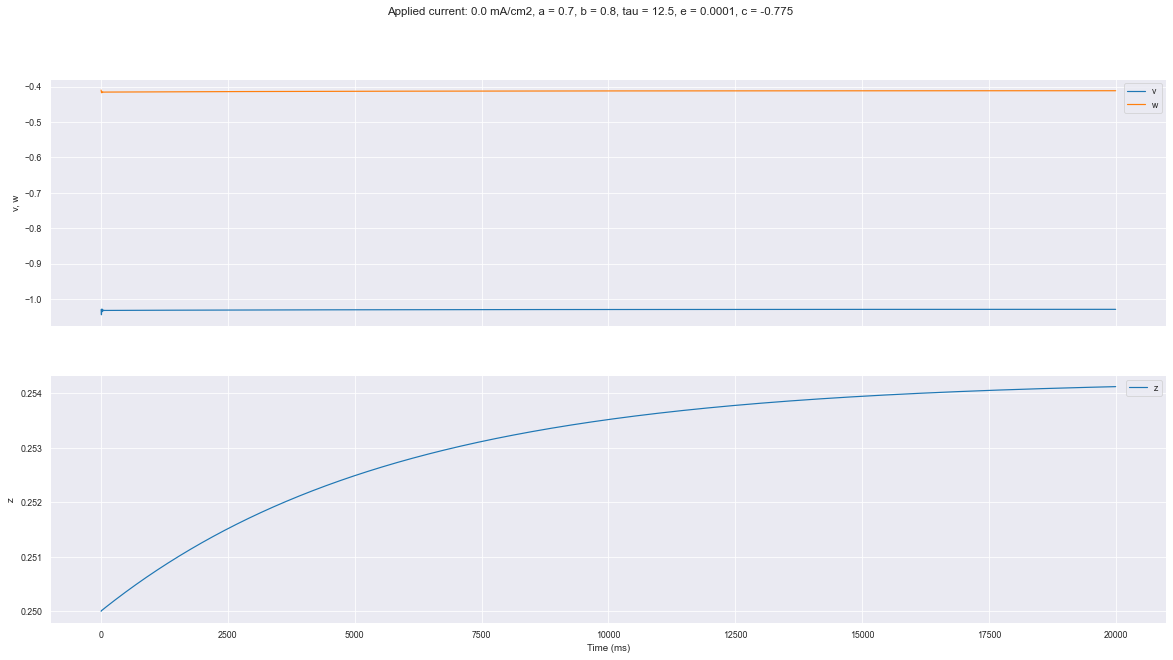

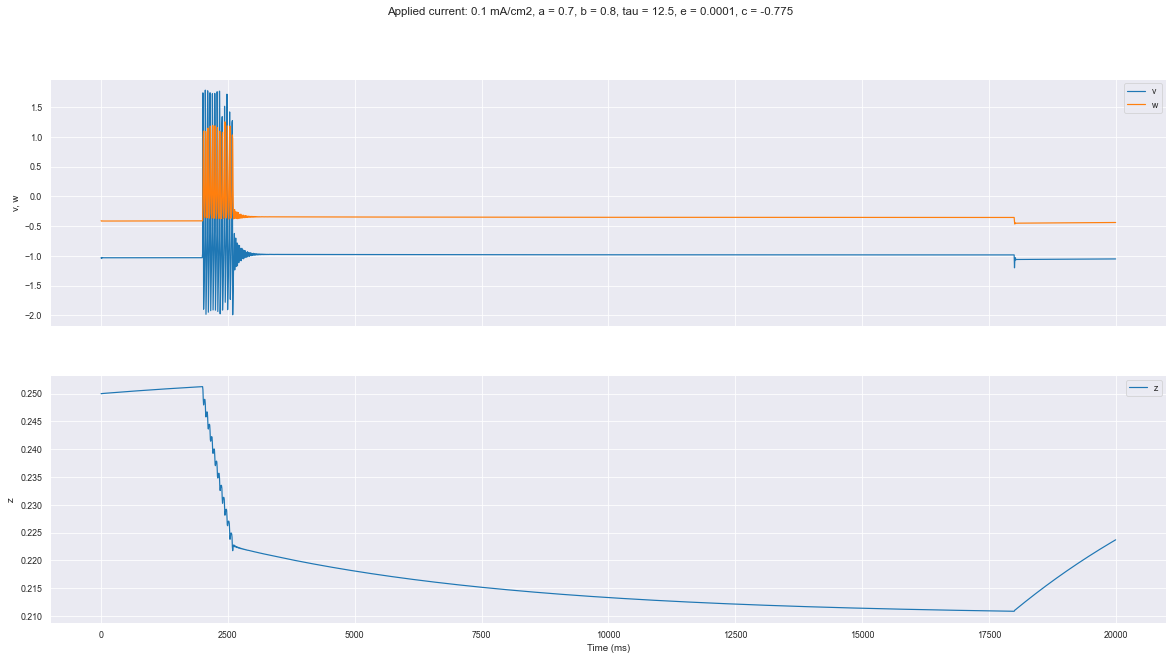

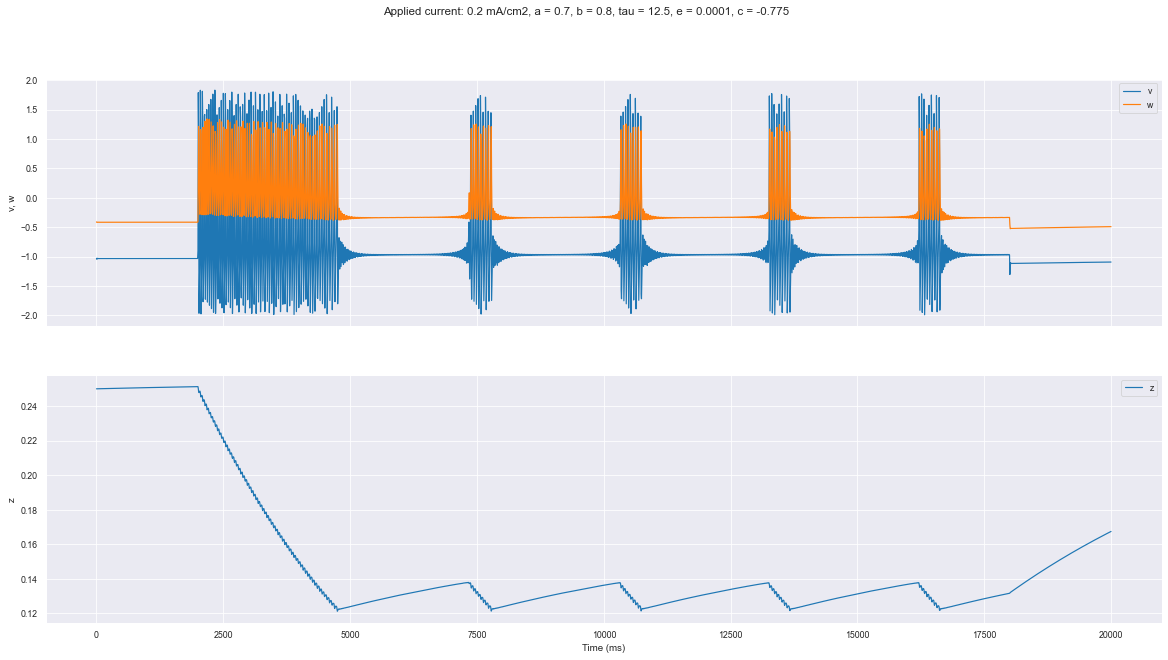

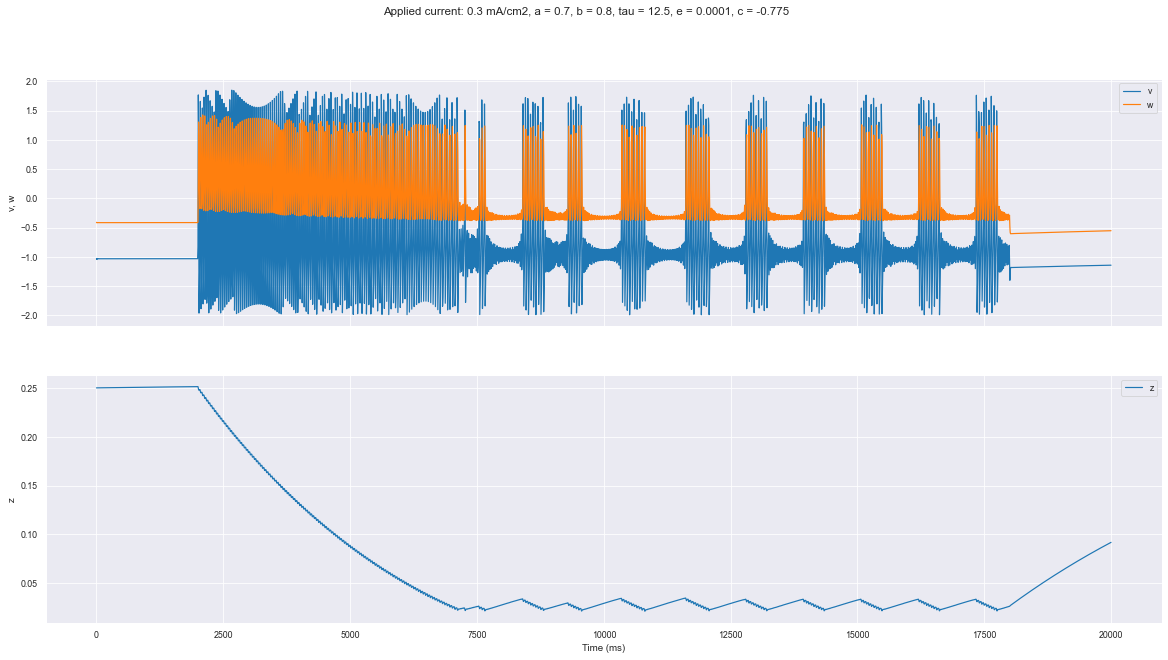

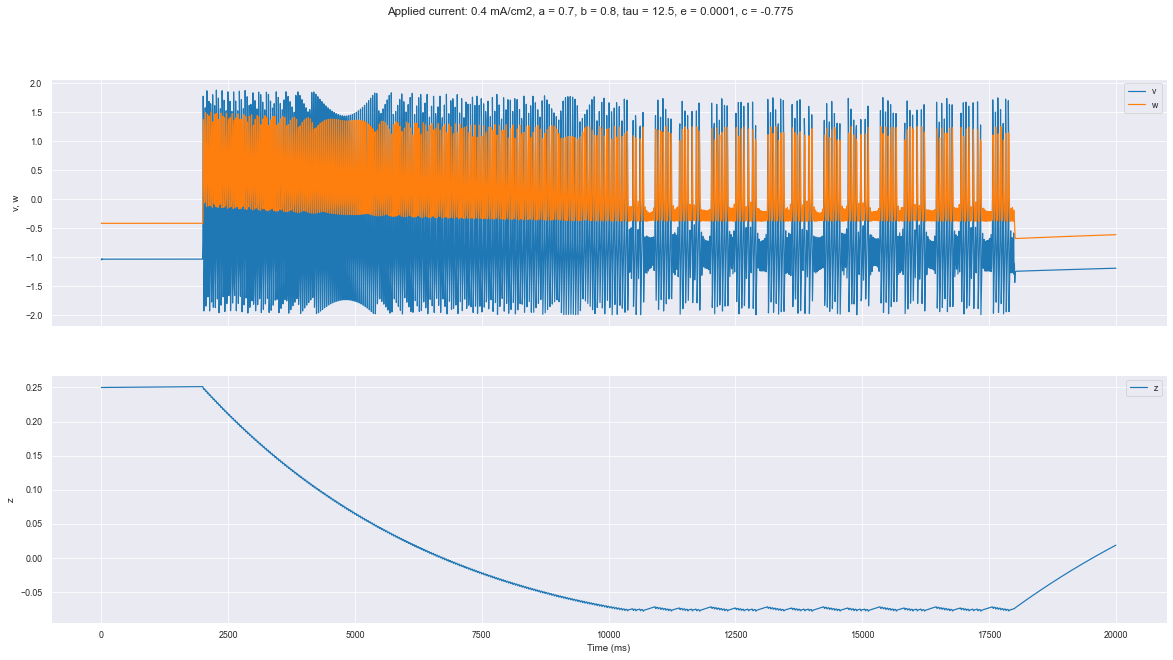

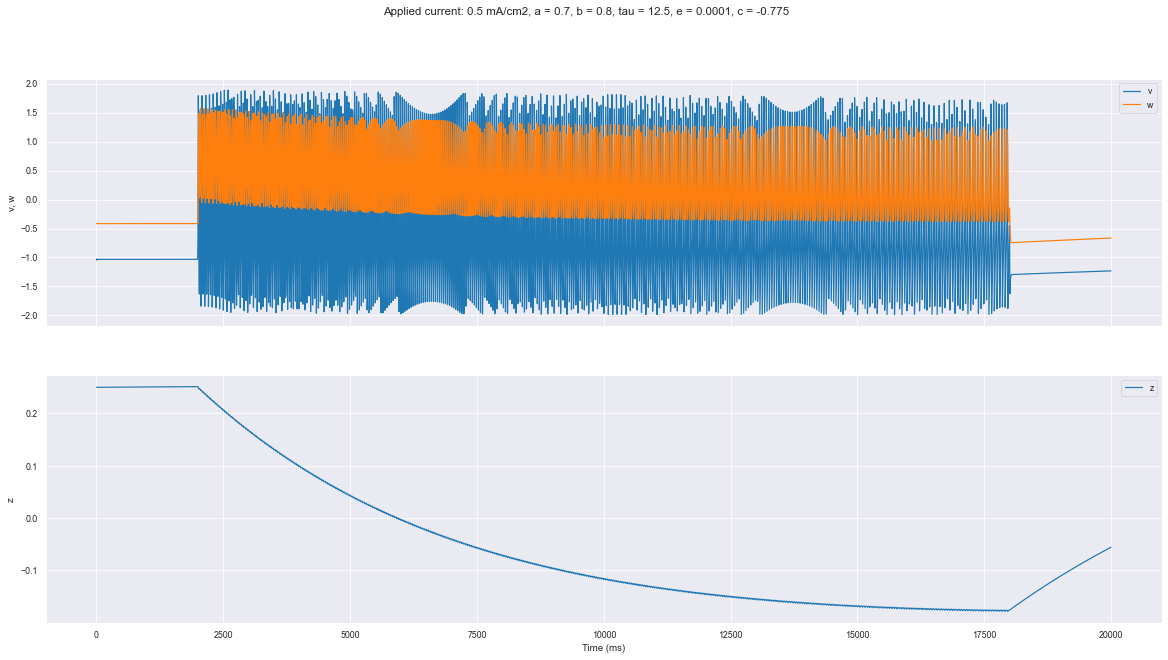

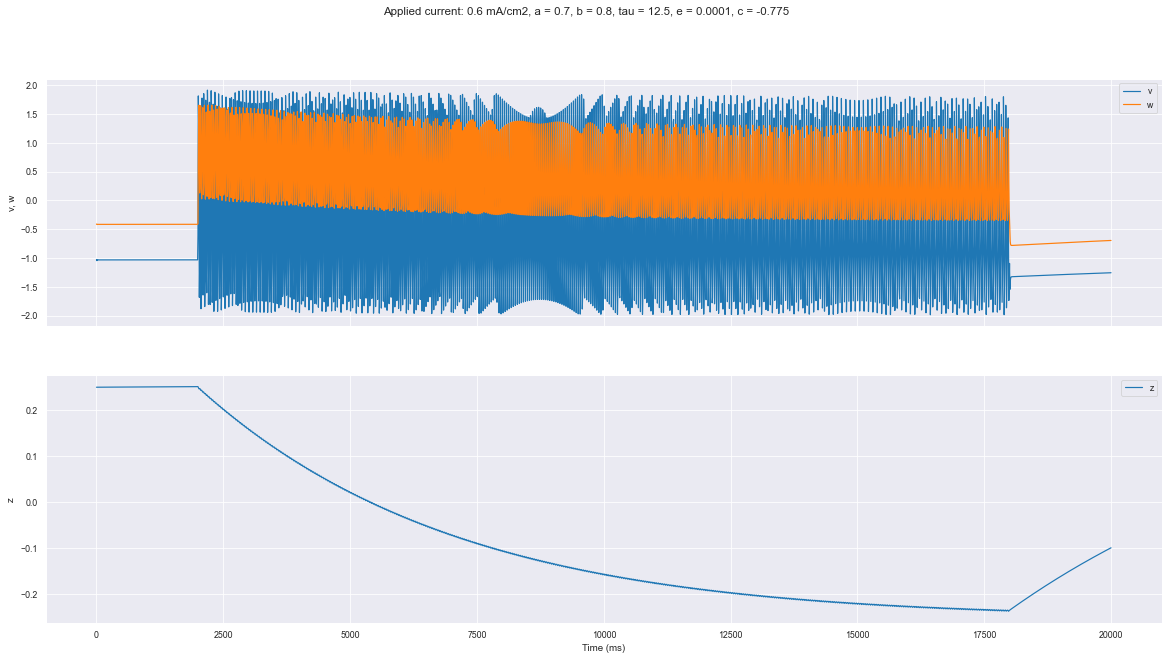

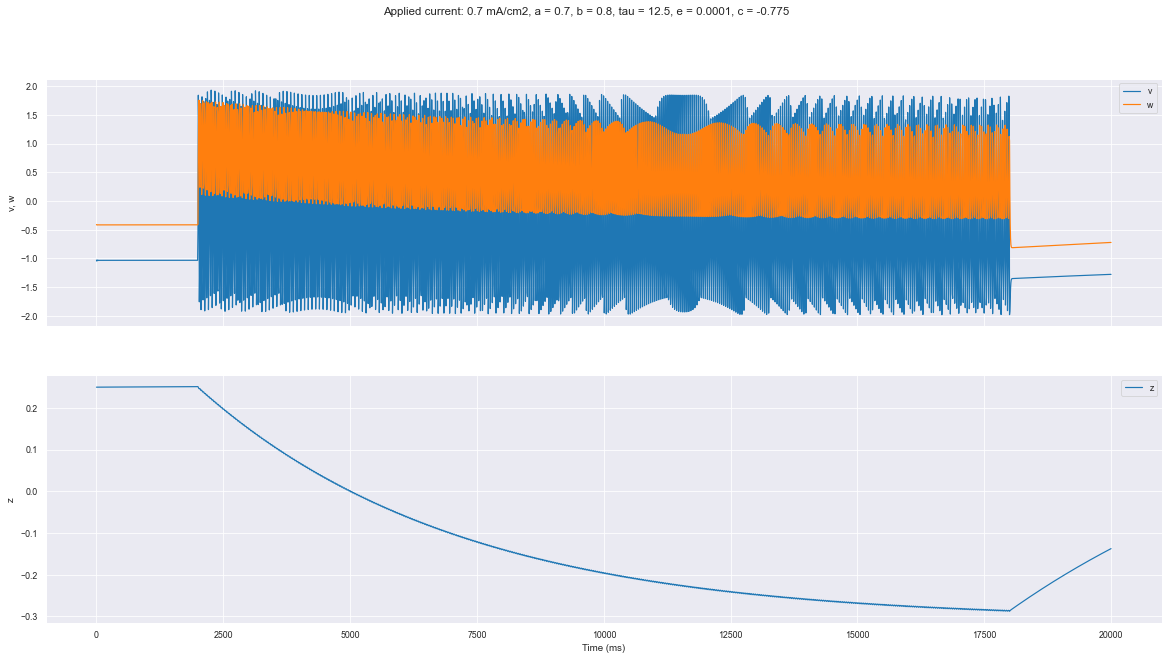

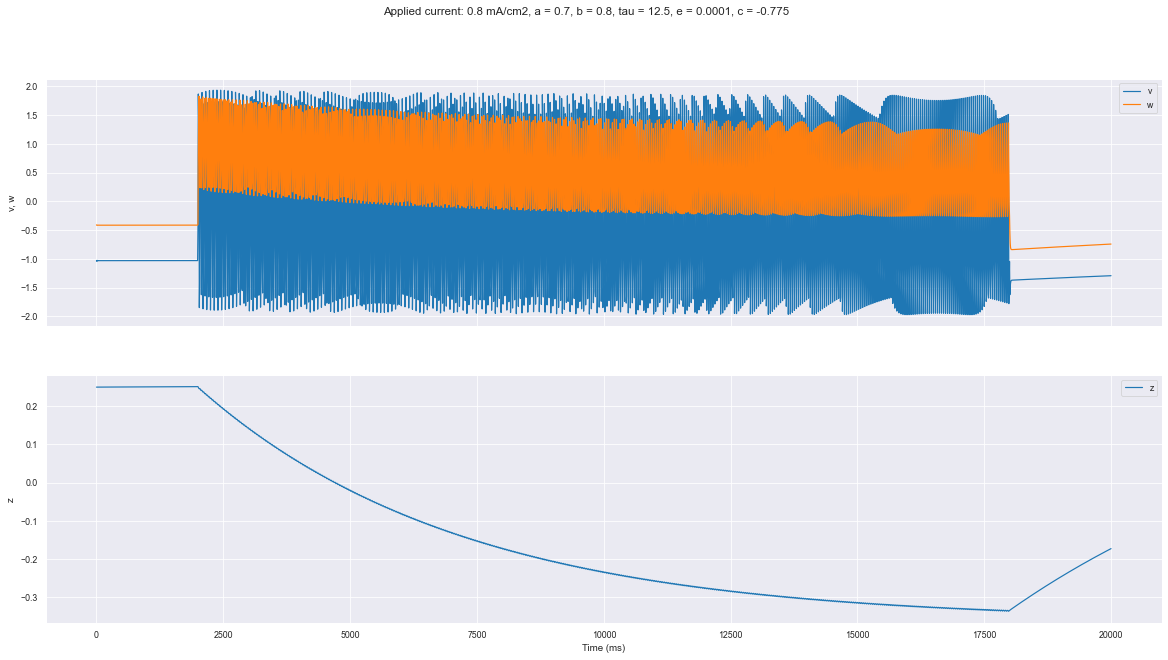

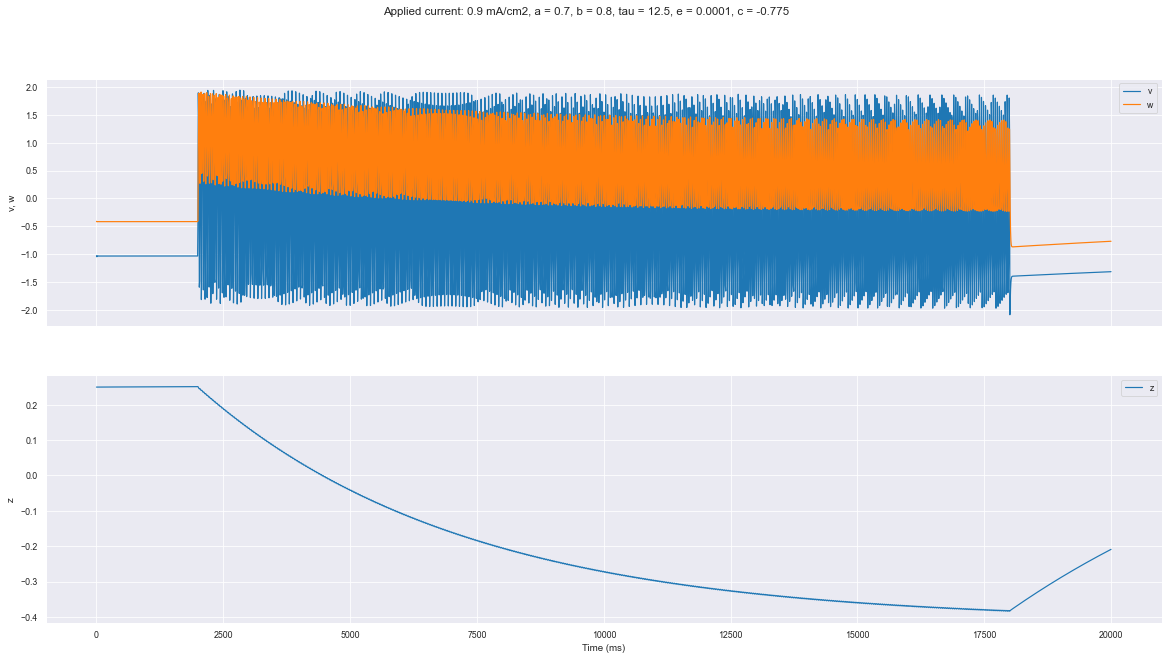

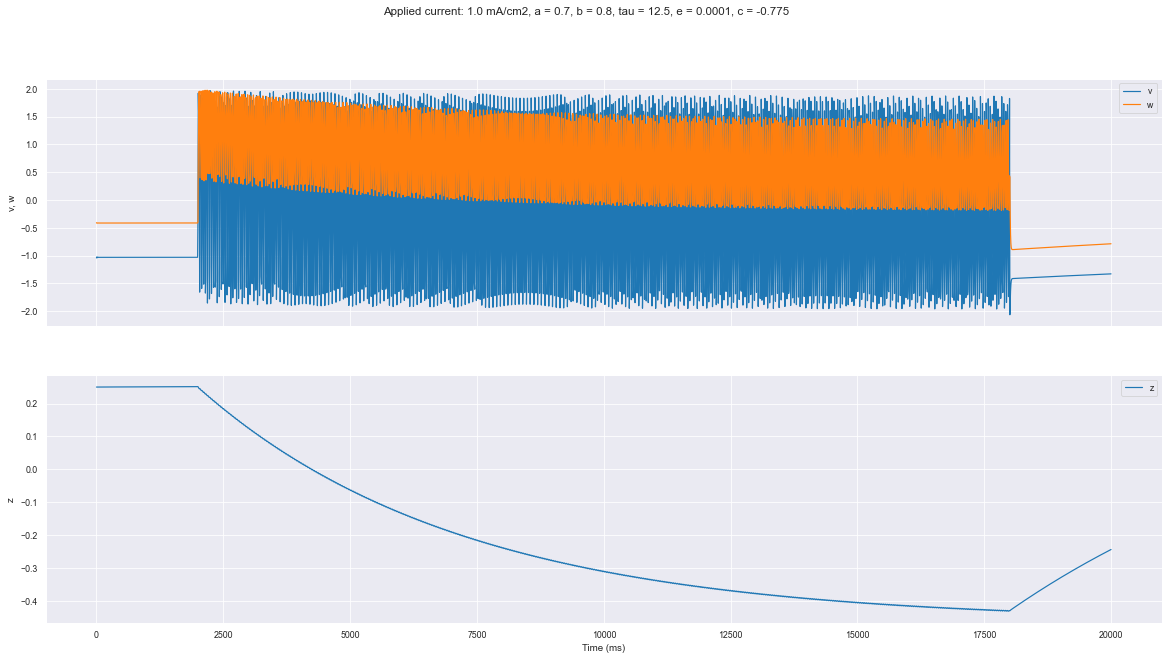

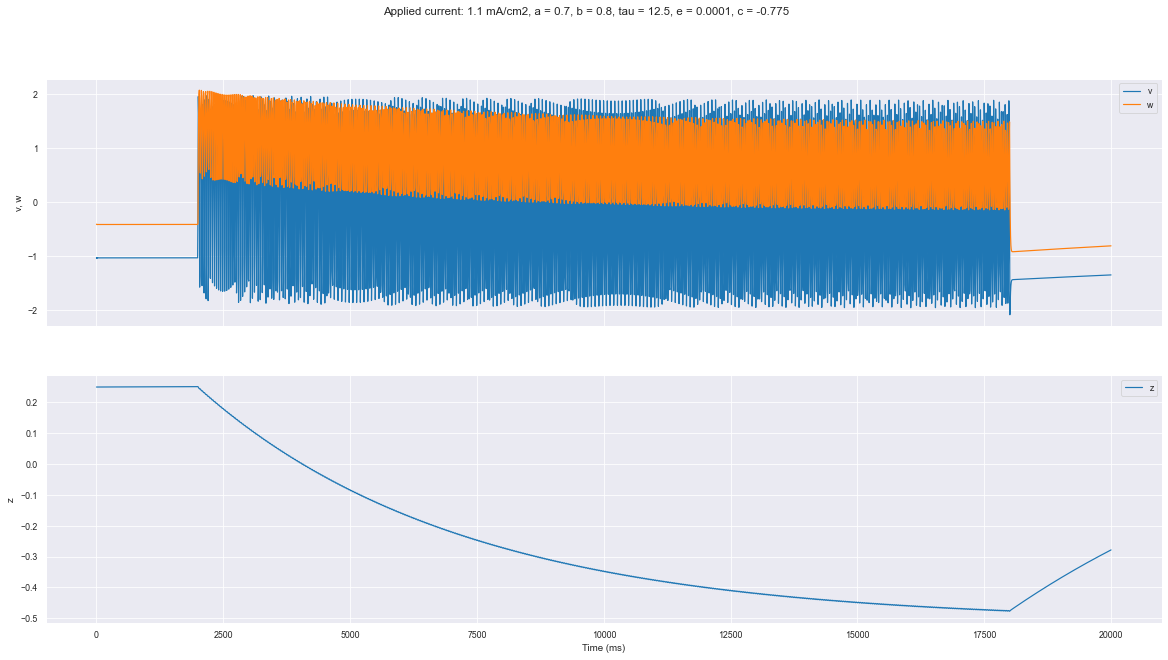

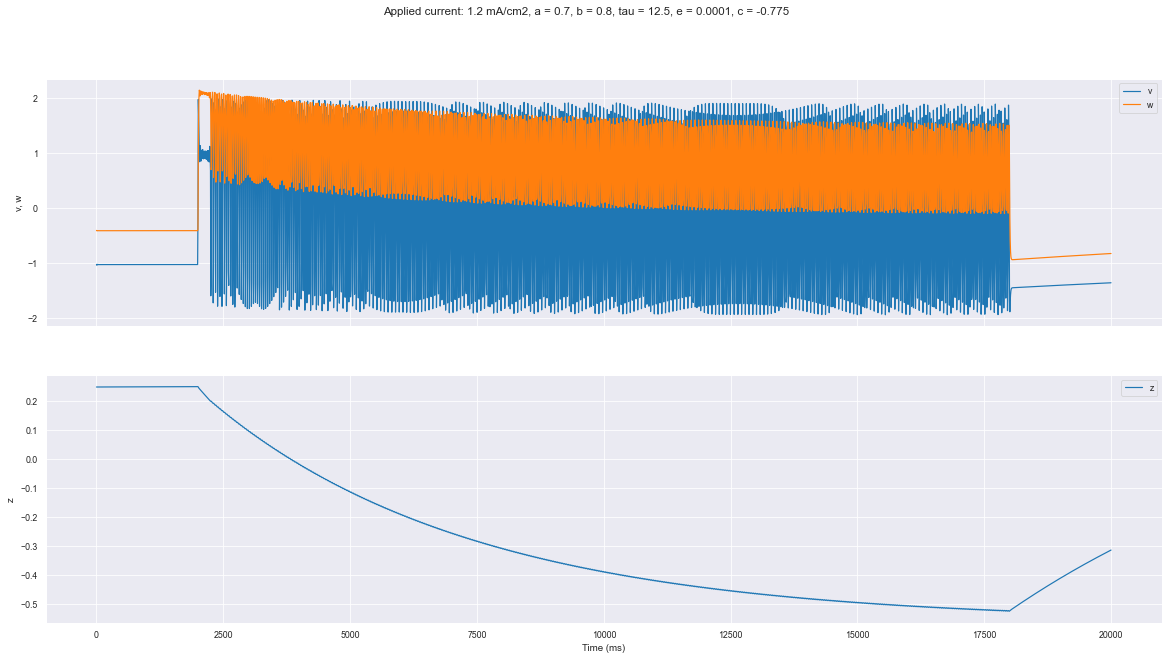

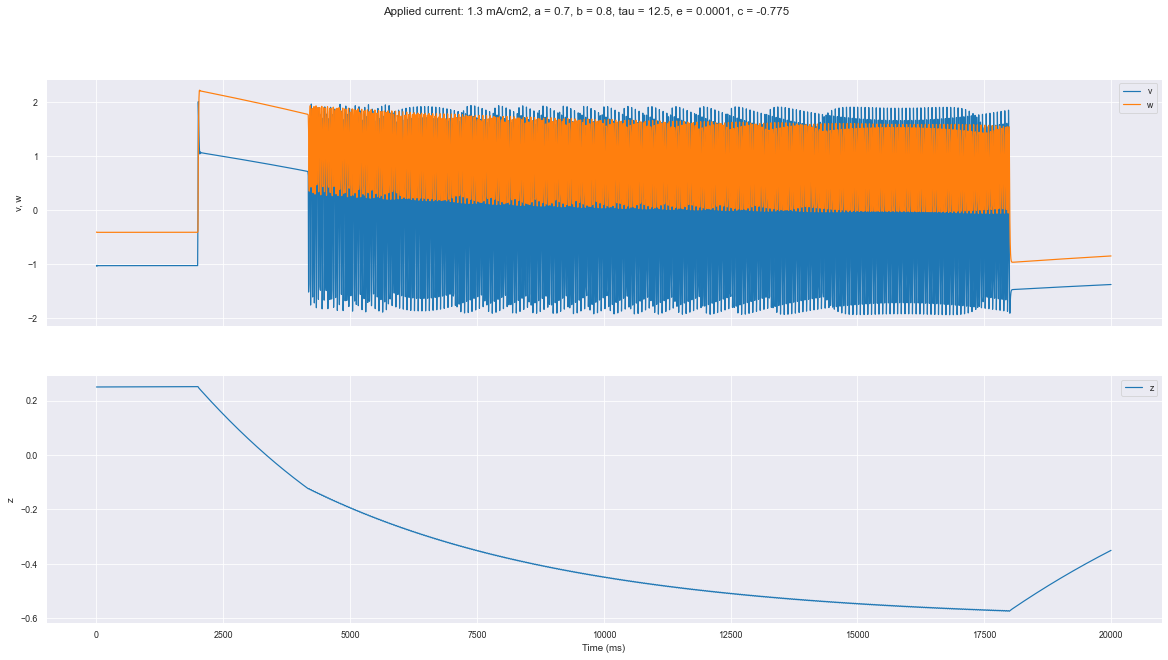

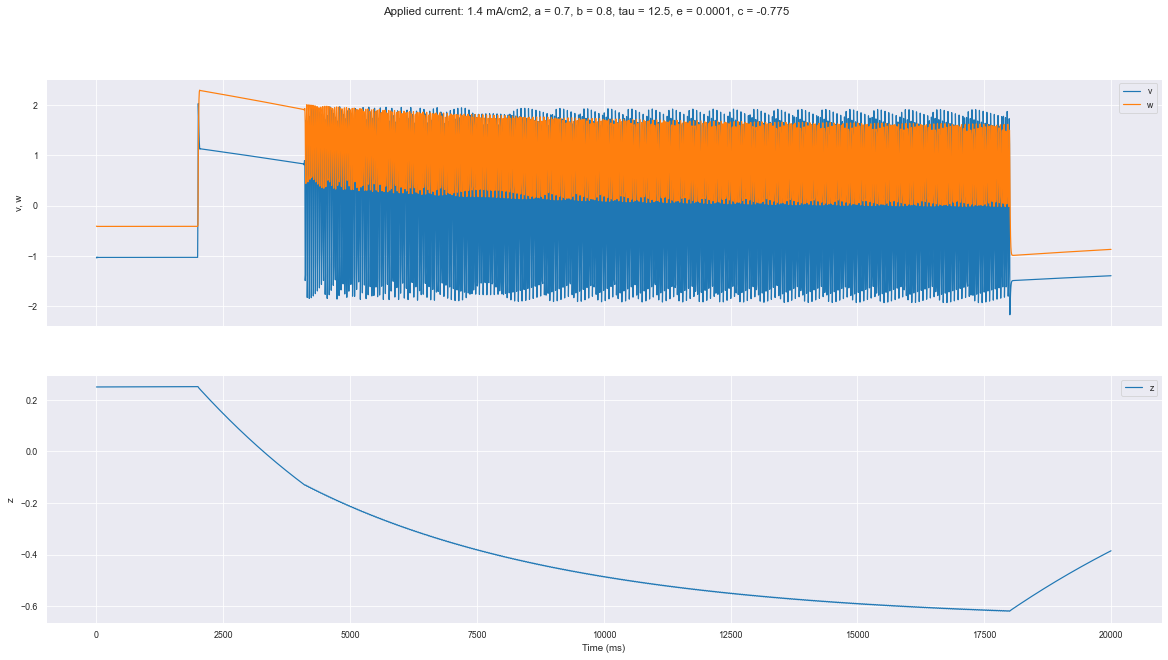

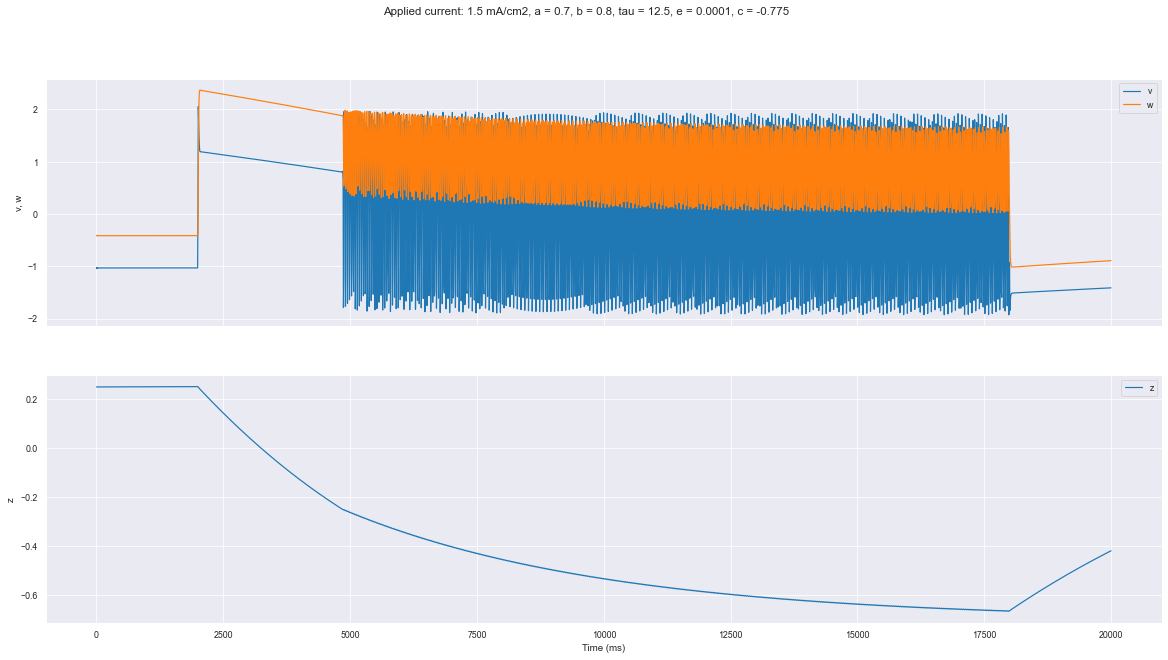

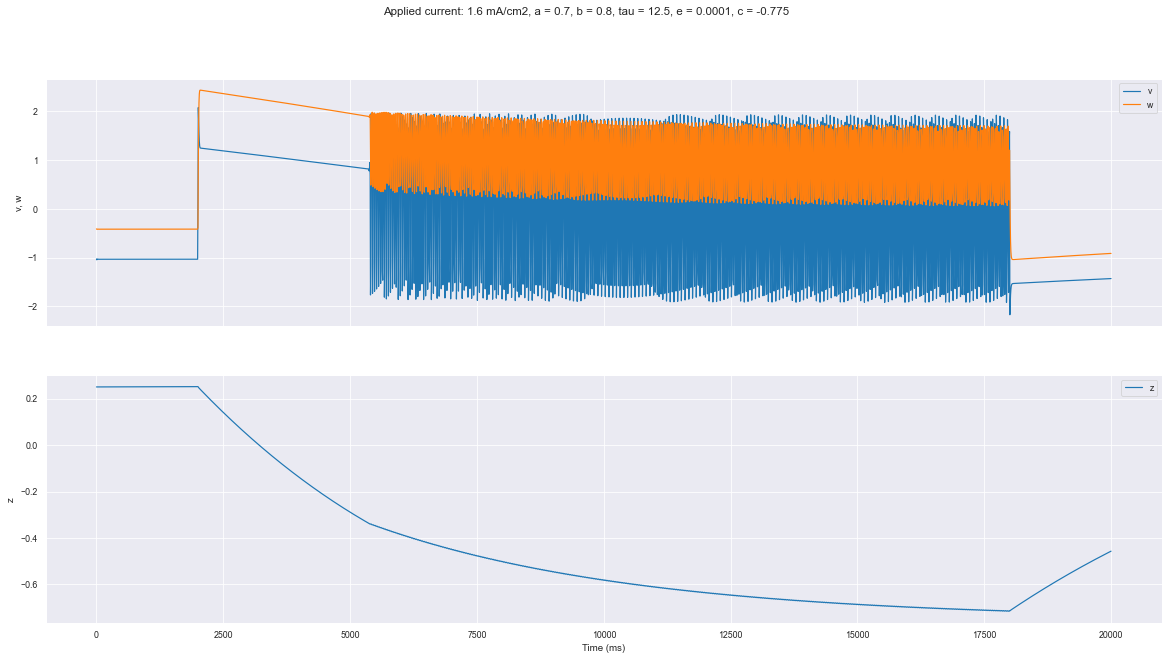

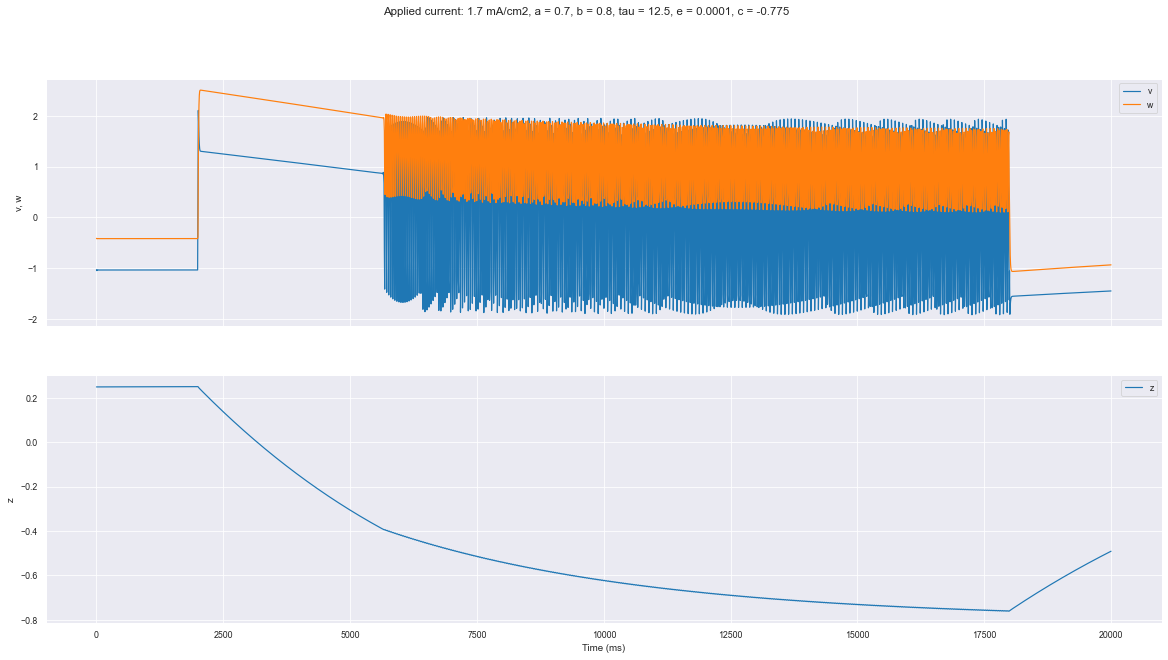

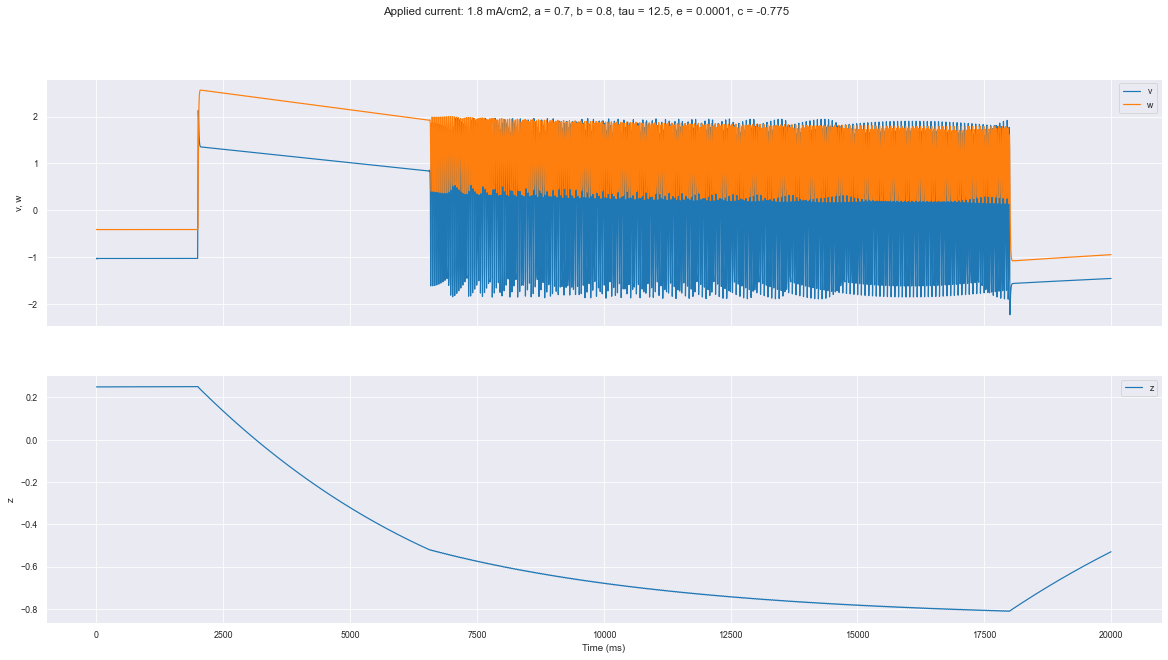

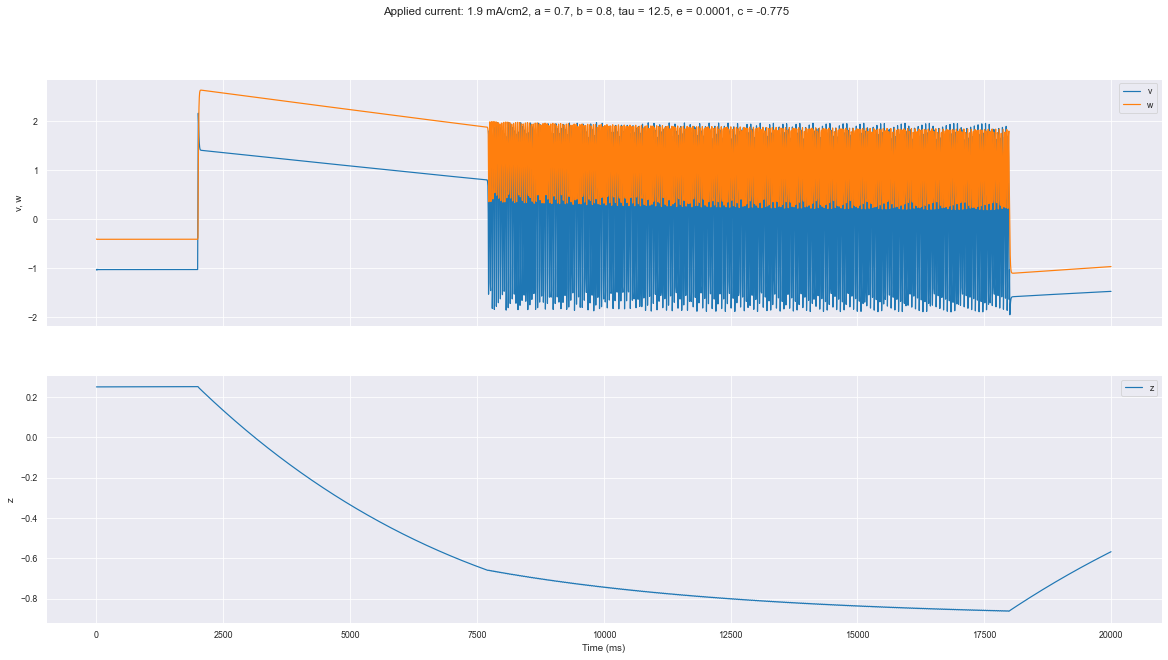

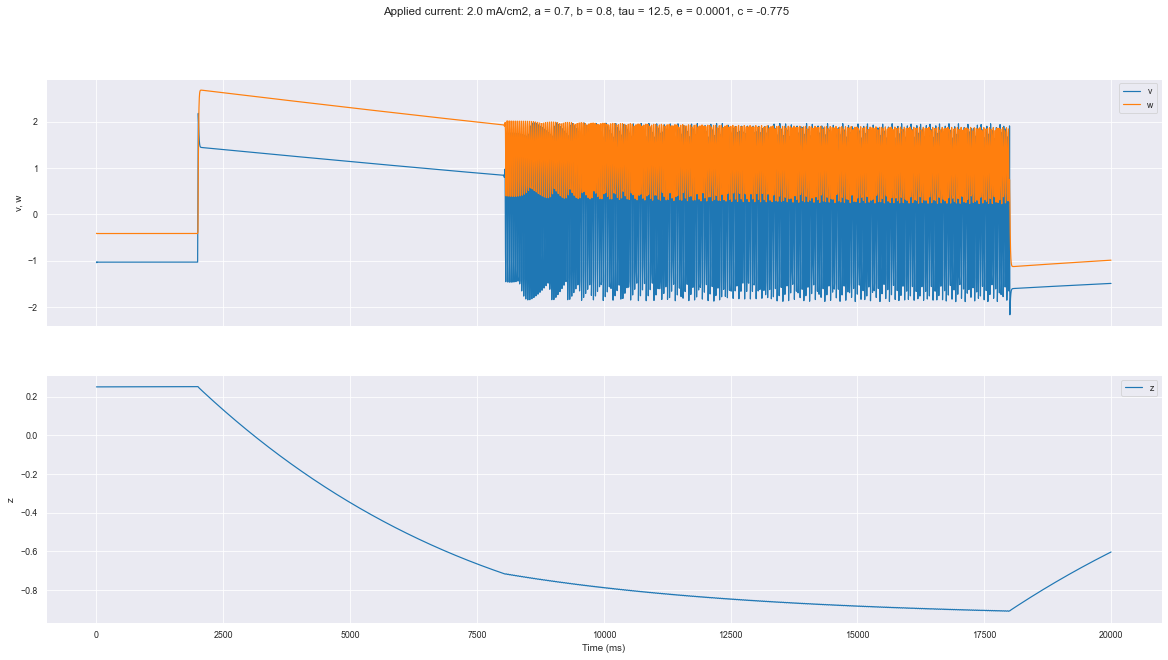

In [87]:
# Finding steady states and threshold current in Rinzel model.
# This cell will show the roots for the Rinzel model and returns individual Rinzel model plots with range of currents.
# Running this cell will take some time.

R_neuron = Rinzel_Neuron()

currents = np.linspace(0,2,num = 21)

for i , current in enumerate(currents):
    R_neuron.plot( R_neuron.solve(round(current,2)), save=[False,'R_Range/R_Range_'+str(current)])


R_neuron.solve_ss()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12c3359d0>,
      dtype=object)

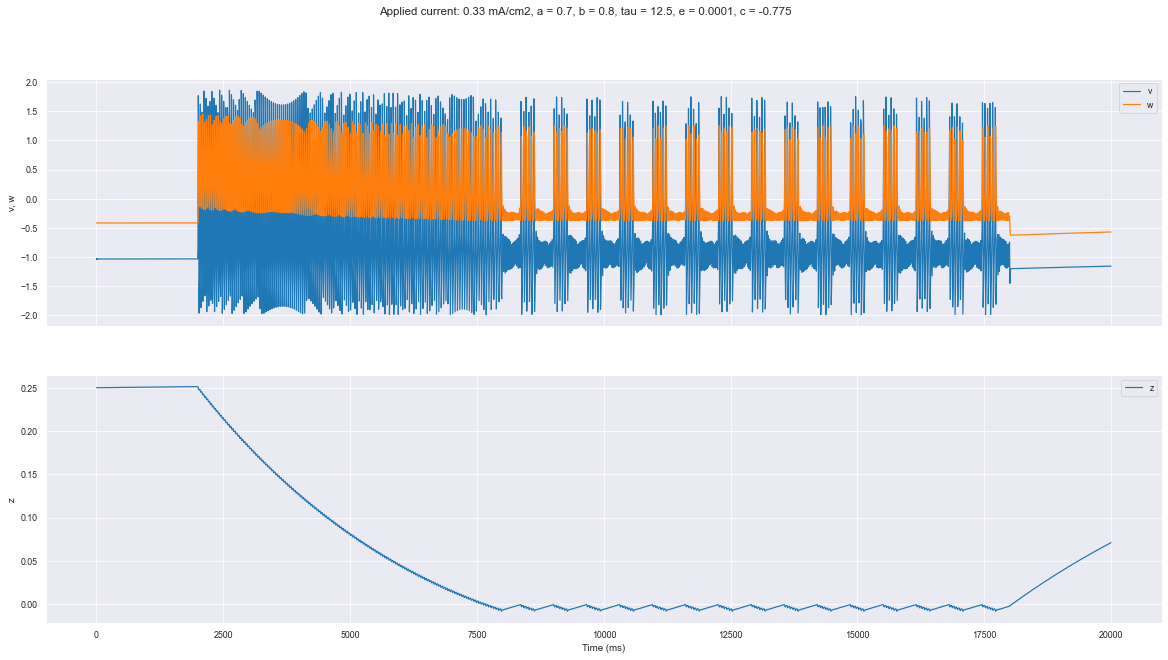

In [62]:
# This cell plots the Rinzel model at threshold current with default params.
I = 0.33
R_neuron.plot( R_neuron.solve(I) , save=[False,'defaultparamsR'])

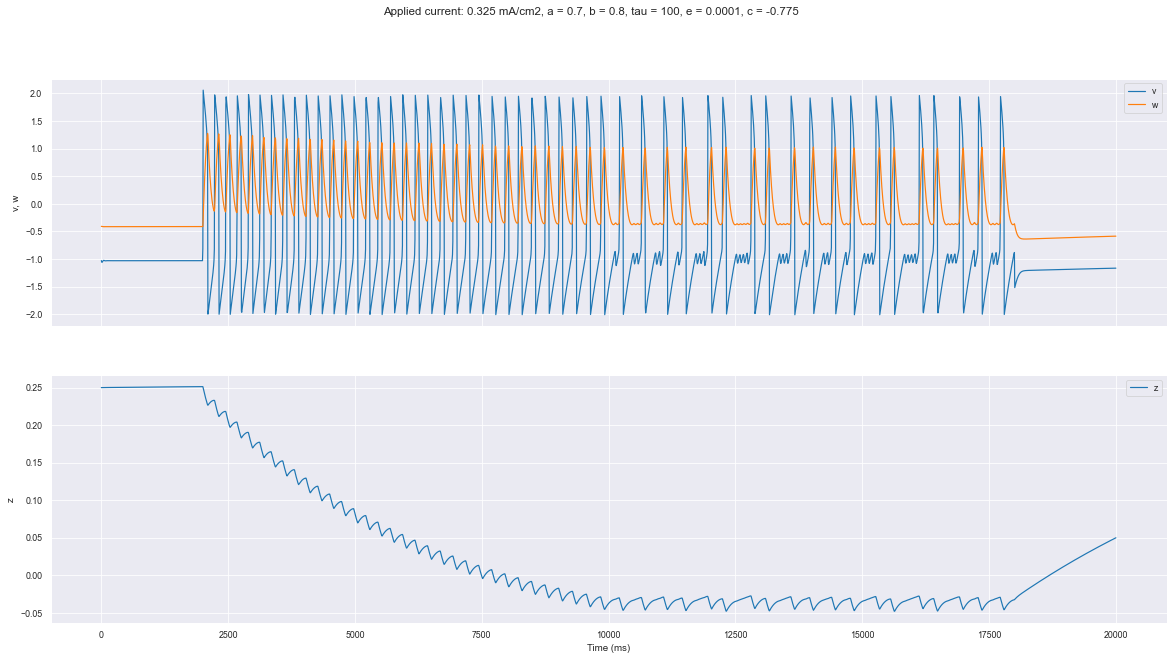

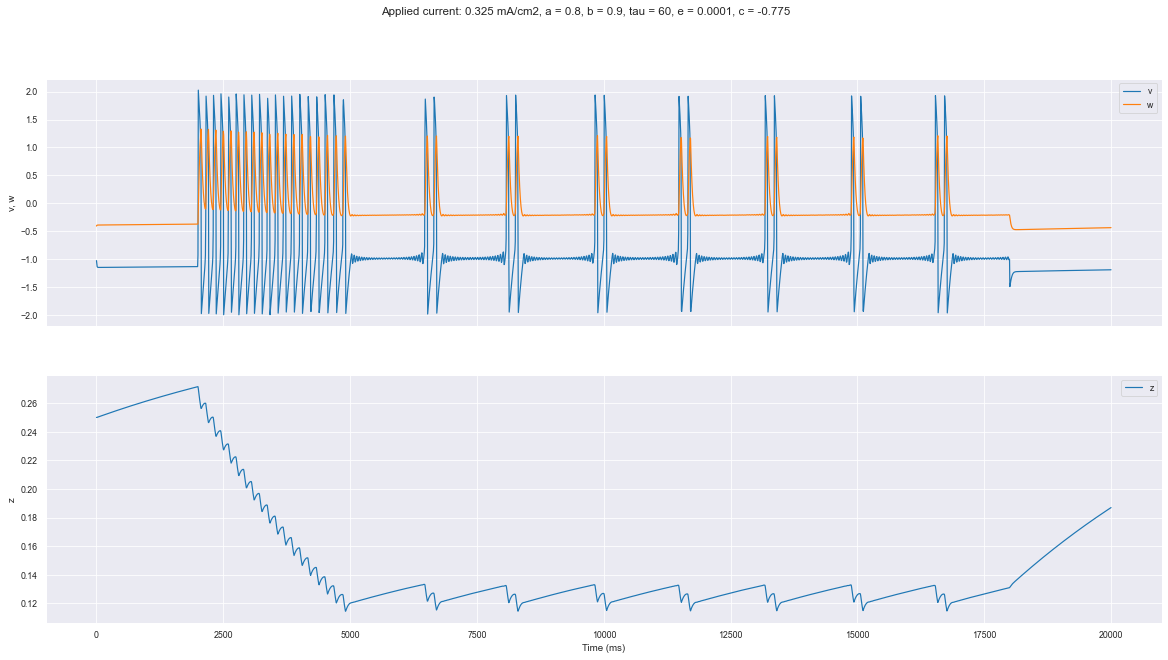

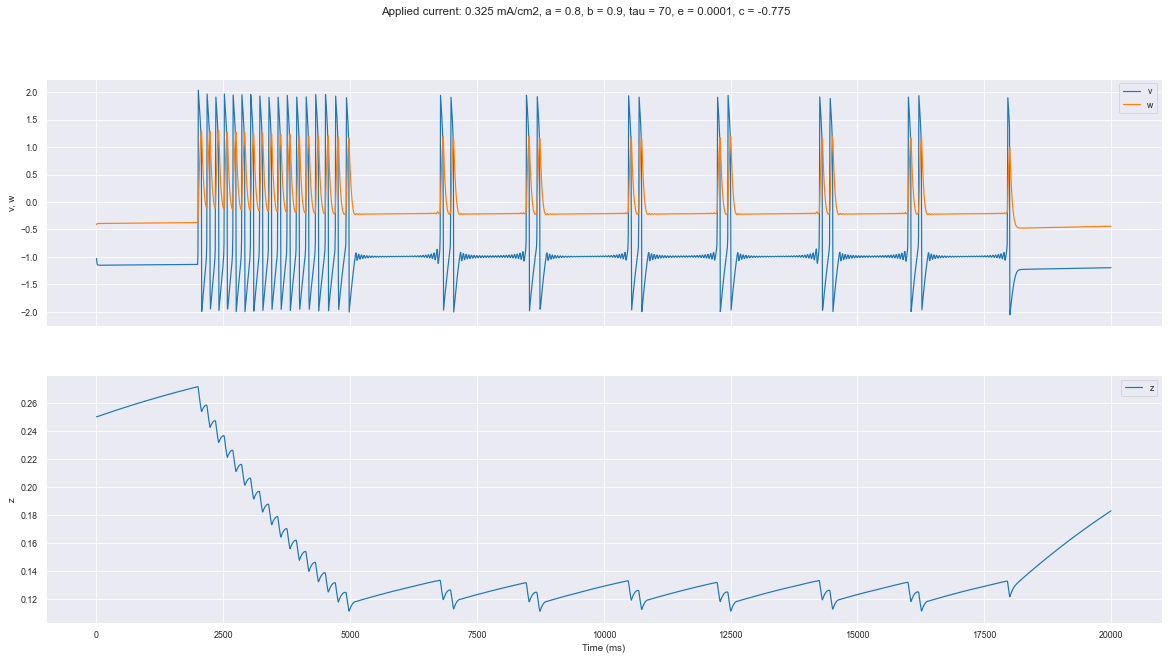

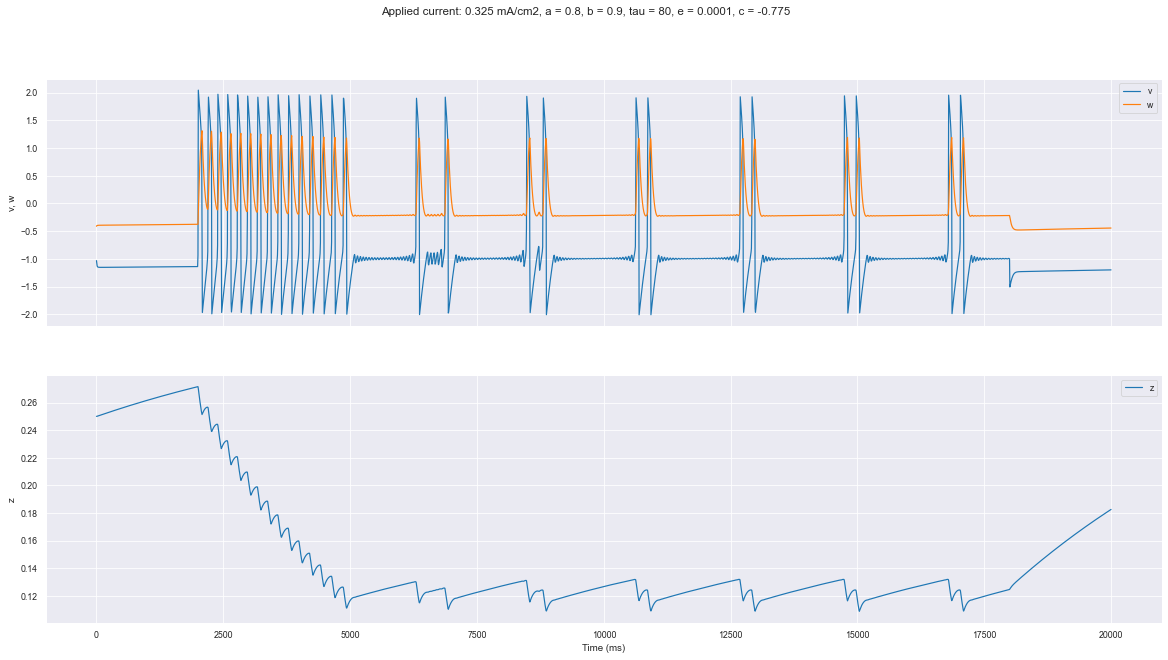

In [83]:
# This cell is used to investigate each parameter.
# Plots two subplots (for v,w and z) per scenario

scenarios = [

    
    {"a":0.7, "b":0.8, "tau":100, "I":0.325, "e":0.0001, "c":-0.775},
    {"a":0.8, "b":0.9, "tau":60, "I":0.325, "e":0.0001, "c":-0.775},
    {"a":0.8, "b":0.9, "tau":70, "I":0.325, "e":0.0001, "c":-0.775},
    {"a":0.8, "b":0.9, "tau":80, "I":0.325, "e":0.0001, "c":-0.775},
]

for i, sc in enumerate(scenarios):
    title = "/Rinzel/match_tau=%s" % sc['tau']
    
    R_neuron = Rinzel_Neuron(a = sc['a'], b = sc['b'], tau = sc['tau'], e = sc['e'], c = sc['c'])
    R_neuron.plot(R_neuron.solve(sc['I']), save=[False,title])

# plt.savefig('Figures/'+title+'.eps', format='eps')